## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Analyze the customer data provided and develop a solution that will help determine whether a customer will churn.

### b) Defining the Metric for Success

We will have achieved our objective when we get at least one model with an accuracy score of around 80%.

### c) Understanding the Context 

You work as a Data Scientist for MTN Africa, a leading Telecommunications Company in Africa. In an effort to understand the behaviour of the company's customers, you are tasked to analyze relevant customer data and develop a solution that will help determine whether a customer will churn. In addition, you will be expected to help relevant stakeholders understand the potential of your developed solution.

### d) Recording the Experimental Design

1. Load libraries and dataset.
2. Deal with duplicates and missing data.
3. Find and deal with other anomalies.
4. Drop unnecessary columns.
5. Perform univariate and bivariate analysis.
6. Test formulticollinearity.
7. Data modelling.
8. Summarize findings.
9. Make recommendations.
10. Challenge solution.

### e) Data Relevance

The data provided is sufficient and appropriate for answering the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [43]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings("ignore")

In [135]:
import matplotlib.style as style

style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
!pip install mplcyberpunk
  
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")
plt.plot([1, 3, 9, 5, 2, 1, 1], marker='o')
plt.plot([4, 5, 5, 7, 9, 8, 6], marker='v')
plt.plot([2, 3, 4, 3, 4, 5, 3], marker='s')
# Add glow effects-Optional
mplcyberpunk.add_glow_effects()
plt.show()

In [45]:
# load and preview dataset
df = pd.read_csv('call-center-data-QueryResult.csv')
df.sample(3)

,recordid,customer_id,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes_2,total_intl_calls_2,total_intl_charge,number_customer_service_calls,churn
5933,5934,28964575.0,74,510,True,14.1,4,False,0,125.8,103,21.39,207.7,96,17.65,207.4,143,9.33,14.1,4,3.81,1,True
1742,1743,24925588.0,50,415,False,6.1,2,False,0,157.1,90,26.71,223.3,72,18.98,181.4,111,8.16,6.1,2,1.65,1,False
1565,1566,59701821.0,152,408,False,8.2,4,False,0,298.1,113,50.68,228.0,119,19.38,228.1,98,10.26,8.2,4,2.21,4,True


In [46]:
# load glossary
glossary = pd.read_csv('classification_analysis_glossary.csv',header = None)
glossary

,0
0,account_length - Age of account in months.
1,customer_id - Enterprise ID of the customer.
2,area_code - Area code.
3,international_plan - Rather or not the customer has an international calling plan.
4,voice_mail_plan - Rather or not the customer has a voice mail plan.
5,number_vmail_messages - Number of VM messages customer currently has on the server.
6,total_day_minutes - Customers total usage of day minutes in plan.
7,total_day_calls - Total number of calls customer has made during the day.
8,total_day_charge - How much the customer has been charged for day minutes.
9,total_eve_minutes - Total number of calls customer has made during the evening.


In [47]:
# check dataset shape
df.shape

(12892, 23)

Our dataset has 12,892 records and 23 variables.

We will drop 'recordid' and 'customer_id' since we have no need of them and they would interfere with our analysis.

In [48]:
df.drop(columns = ['recordid', 'customer_id'], inplace = True)

In [49]:
# preview variable datatypes
df.dtypes

account_length                     int64
area_code                          int64
international_plan                  bool
total_intl_minutes               float64
total_intl_calls                   int64
voice_mail_plan                     bool
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes_2             float64
total_intl_calls_2                 int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                               bool
dtype: object

With the exception of the 'international_plan', 'voice_mail_plan', and 'churn' variables which are boolean, this dataset is numerical.

In [50]:
# check for duplicates
df.duplicated().sum()

7892

7,892 duplicated records are found. We will drop them.

In [51]:
df = df.drop_duplicates()
df.shape

(5000, 21)

In [52]:
df.isnull().mean() * 100

account_length                   0.0
area_code                        0.0
international_plan               0.0
total_intl_minutes               0.0
total_intl_calls                 0.0
voice_mail_plan                  0.0
number_vmail_messages            0.0
total_day_minutes                0.0
total_day_calls                  0.0
total_day_charge                 0.0
total_eve_minutes                0.0
total_eve_calls                  0.0
total_eve_charge                 0.0
total_night_minutes              0.0
total_night_calls                0.0
total_night_charge               0.0
total_intl_minutes_2             0.0
total_intl_calls_2               0.0
total_intl_charge                0.0
number_customer_service_calls    0.0
churn                            0.0
dtype: float64

No missing values found. We will look at the unique values in each variable just to be safe.

In [53]:
columns = df.columns

for col in columns:
    print("Variable:", col)
    print("Number of unique values:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: account_length
Number of unique values: 218
[101 137 103  99 108 117  63  94 138 128 113 140 102  60  96 178  75 106
 158 111  92  42  69  76  72 115  68  97  90  73  54 161 125 194 141  98
 110  70  66  79  61  77 105 159  83  93 163 169  57  85 132 190  39  84
  71 114 135  82  64 112 166 120 187 100  45  43  52  74  40  56 133 119
 131 118 107 109 127  33 145  47  53 148  55 143 170  65 157  89  91 104
 130  80 146  29  78 185 144  59 139  12 150 156  17 176  95 136 165 149
 124  87  51 126  62  48  58  81  36 177  25 171 122  44 167  41 184  88
 151 160 152  49  13 142   3  23  19 154 116 173  24  15  86 147  21 174
 162 186  14   7   1  18  20  11 192 121 134  67 164 180  35 155  32 123
 182 129  38  37  50  27 188 175   5  26   4  31 193 238  28 195 153 201
 216 183 168 222 232 233  22  46  34   8 217   2 200 172  16  30 202 181
  10   6 179 208 215 199 196 209 224 189 243 205   9 210 212 197 225 191
 204 221]

Variable: area_code
Number of unique values: 3
[510 408 415

We can confirm that there are no missing values in this dataset.

An anomaly has been noted: there appears to be duplicated columns between 'total_intl_minutes' and 'total_intl_minutes_2', and 'total_intl_calls' and 'total_intl_calls_2'. Let's preview them:

In [54]:
# previewing the possibly duplicated columns
df[['total_intl_minutes', 'total_intl_calls', 'total_intl_minutes_2', 'total_intl_calls_2']]

,total_intl_minutes,total_intl_calls,total_intl_minutes_2,total_intl_calls_2
0,10.6,3,10.6,3
1,9.5,7,9.5,7
2,13.7,6,13.7,6
3,15.7,2,15.7,2
4,7.7,4,7.7,4
...,...,...,...,...
4995,9.9,6,9.9,6
4996,9.6,4,9.6,4
4997,14.1,6,14.1,6
4998,5.0,10,5.0,10


The last two columns appear to be complete copies of the first two. We will confirm this so that we do not blindly drop them.

In [55]:
# selecting the total number of records where the values of 'total_intl_minutes' are equal to the values of 
# 'total_intl_minutes_2', AND the values of 'total_intl_calls' are equal to the values of 'total_intl_calls_2'
df[(df['total_intl_minutes'] == df['total_intl_minutes_2']) & (df['total_intl_calls'] == df['total_intl_calls_2'])].count()

account_length                   5000
area_code                        5000
international_plan               5000
total_intl_minutes               5000
total_intl_calls                 5000
voice_mail_plan                  5000
number_vmail_messages            5000
total_day_minutes                5000
total_day_calls                  5000
total_day_charge                 5000
total_eve_minutes                5000
total_eve_calls                  5000
total_eve_charge                 5000
total_night_minutes              5000
total_night_calls                5000
total_night_charge               5000
total_intl_minutes_2             5000
total_intl_calls_2               5000
total_intl_charge                5000
number_customer_service_calls    5000
churn                            5000
dtype: int64

We see that the columns are indeed duplicates so we can safely drop them.

In [56]:
df = df.drop(columns = ['total_intl_minutes_2', 'total_intl_calls_2'])
df.shape

(5000, 19)

Another anomaly noted is that where there are records of 'total_intl_minutes', 'total_int_calls', and 'total_intl_charge' when 'international_plan' is False.

In [57]:
df[(df['international_plan'] == False) & ((df['total_intl_minutes'] > 0) | (df['total_intl_calls'] > 0) |
                                         df['total_intl_charge'] > 0)]

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,False,10.6,3,False,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,2.86,3,False
1,137,510,False,9.5,7,False,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,2.57,0,False
2,103,408,False,13.7,6,True,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,3.70,1,False
3,99,415,False,15.7,2,False,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,4.24,1,False
4,108,415,False,7.7,4,False,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,2.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,79,415,False,11.8,5,False,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,3.19,2,False
4995,192,415,False,9.9,6,True,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,2.67,2,False
4996,68,415,False,9.6,4,False,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,2.59,3,False
4997,28,510,False,14.1,6,False,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,3.81,2,False


In [58]:
df.international_plan.value_counts()

False    4527
True      473
Name: international_plan, dtype: int64

Much as we'd like to remove these invalid variables, doing so would result in a huge loss of data. We will therefore leave them as is, but flag them for future work.

We will check to confirm that there are no 'number_vmail_messages' when 'voice_mail_plan' is set to False.

In [59]:
df[(df['voice_mail_plan'] == False) & (df['number_vmail_messages'] > 0)]

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn


After confirming this, we can now drop the 'voice_mail_plan' column.

In [60]:
df.drop(columns = ['voice_mail_plan'], inplace = True)

In [61]:
df.shape

(5000, 18)

In [62]:
df.dtypes

account_length                     int64
area_code                          int64
international_plan                  bool
total_intl_minutes               float64
total_intl_calls                   int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_charge                float64
number_customer_service_calls      int64
churn                               bool
dtype: object

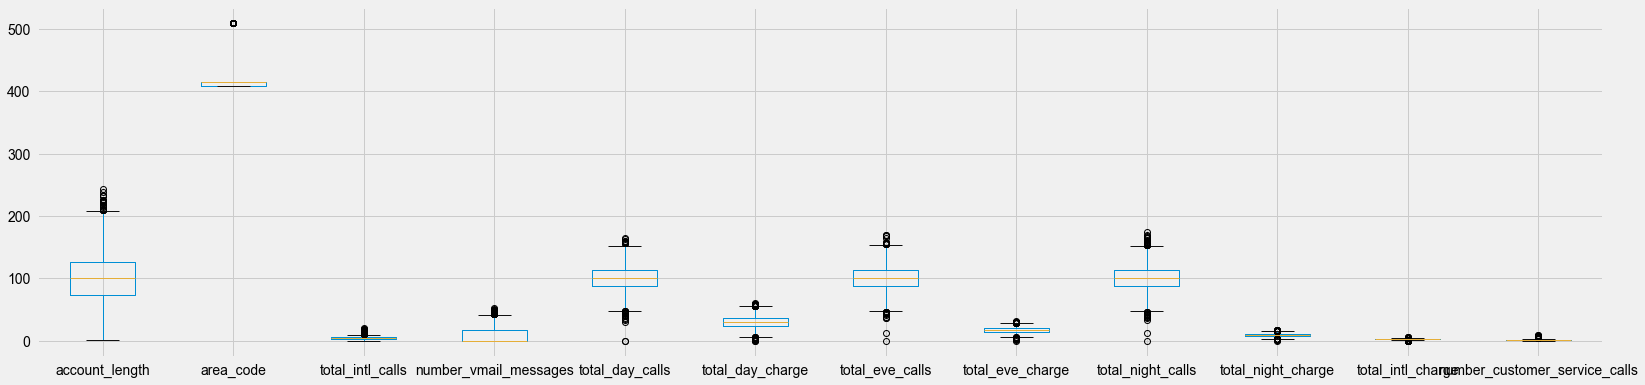

In [140]:
# looking for outliers
num_cols = df.columns.to_list()
num_cols.remove('international_plan')
num_cols.remove('churn')

plt.style.use("fivethirtyeight")
plt.figure(figsize = (25, 6))
df.boxplot(num_cols)
plt.xticks(rotation = 0, color='black', fontsize=14)
plt.yticks(color='black', fontsize=14)
plt.show()

# sns.boxplot(df["total_day_charge"], color = 'white')

We see that all the remaining variables have outliers, which we will not drop.

We now save our clean dataset to a new CSV file.

In [64]:
# save the data set to a clean CSV file

df.to_csv('call_center_clean.csv', index = False)

df = pd.read_csv('call_center_clean.csv')
df.head()

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,False,10.6,3,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,2.86,3,False
1,137,510,False,9.5,7,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,2.57,0,False
2,103,408,False,13.7,6,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,3.70,1,False
3,99,415,False,15.7,2,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,4.24,1,False
4,108,415,False,7.7,4,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,2.08,2,False


## <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 Univariate Analysis

In [65]:
# get the summary statistics
df.describe()

,account_length,area_code,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,10.261780,4.435200,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,2.771196,1.570400
std,39.69456,42.209182,2.761396,2.456788,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,8.500000,3.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,2.300000,1.000000
50%,100.00000,415.000000,10.300000,4.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,2.780000,1.000000
75%,127.00000,415.000000,12.000000,6.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,3.240000,2.000000
max,243.00000,510.000000,20.000000,20.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,5.400000,9.000000


415    2495
408    1259
510    1246
Name: area_code, dtype: int64


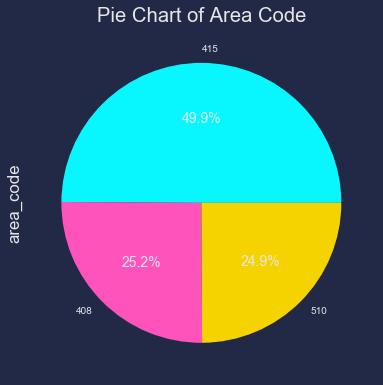

In [152]:
print(df.area_code.value_counts())

plt.style.use("cyberpunk")
plt.figure(figsize = (10, 6))
df.area_code.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Pie Chart of Area Code')
plt.show()

Area Code 415 consists of almost half of the area codes in this dataset. Area Code 510 very slightly outnumbers Area Code 408.

False    4527
True      473
Name: international_plan, dtype: int64


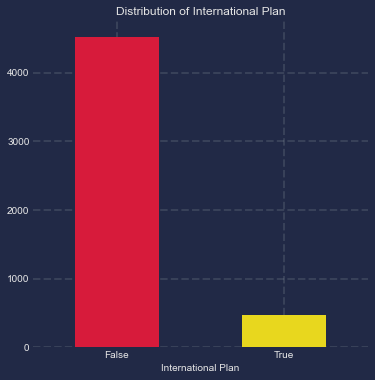

In [67]:
print(df.international_plan.value_counts())

plt.figure(figsize = (6, 6))
df.international_plan.value_counts().plot(kind = 'bar', rot = 0, color = ['#d71b3b', '#e8d71e'])
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.2)
plt.title('Distribution of International Plan')
plt.xlabel('International Plan')
plt.show()

Very few of the customers are subscribed to an international plan.

1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
9       2
8       2
Name: number_customer_service_calls, dtype: int64


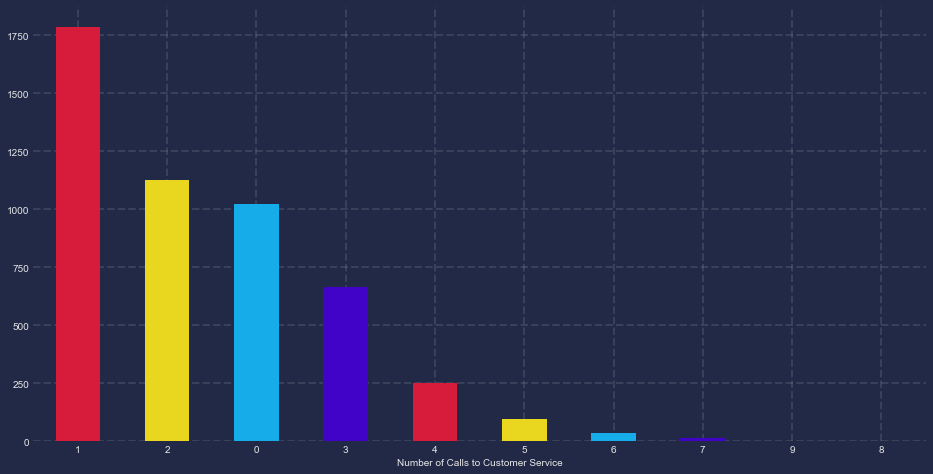

In [68]:
print(df.number_customer_service_calls.value_counts())

plt.figure(figsize = (16, 8))
df.number_customer_service_calls.value_counts().plot(kind = 'bar', rot = 0, color = ["#d71b3b", "#e8d71e", "#16acea" , "#4203c9"])
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.2)
plt.xlabel("Number of Calls to Customer Service")
plt.show()

Most customers made exactly 1 call to customer service followed by those who made 2 calls, and then those who made 0 calls. Those who made more than 5 calls make up the minority.

False    4293
True      707
Name: churn, dtype: int64


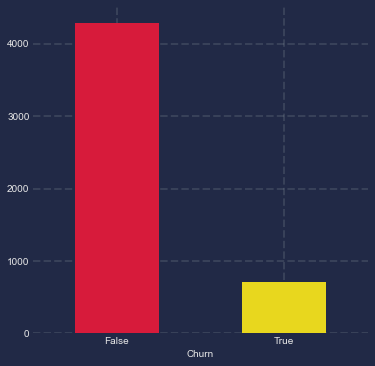

In [69]:
print(df.churn.value_counts())

plt.figure(figsize = (6, 6))
df.churn.value_counts().plot(kind ='bar', rot = 0, color = ['#d71b3b', '#e8d71e'])
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.2)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
plt.xlabel("Churn")
plt.show()

Majority of the customers in this dataset have not churned, thereby making this dataset very biased.

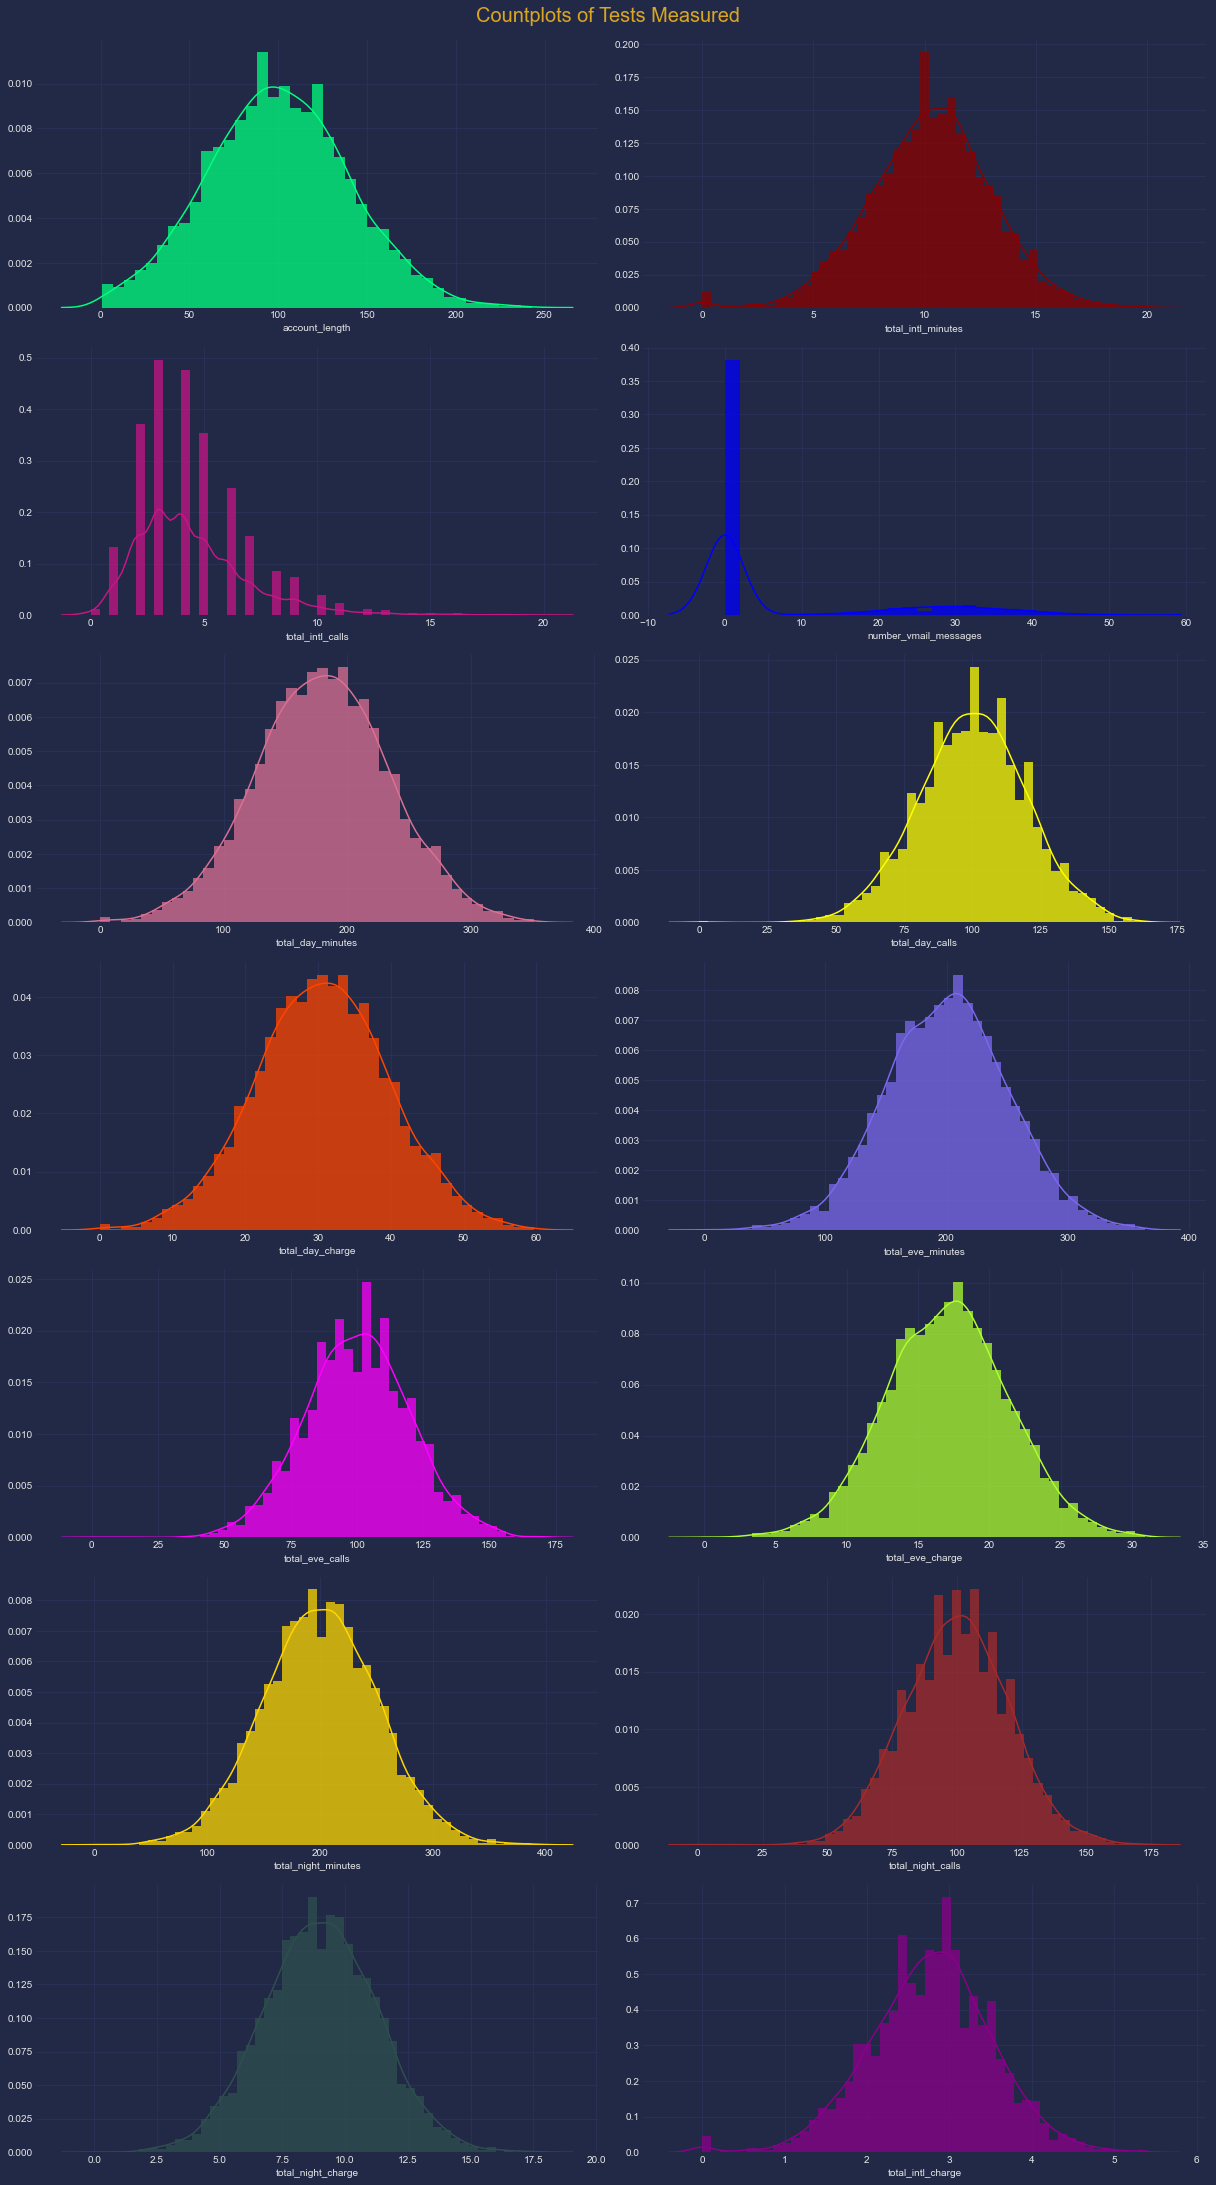

In [70]:
# plotting the histograms of all our numerical variables with the
# exception of 'area_code' and 'number_customer_service_calls'
num_cols.remove('area_code')
num_cols.remove('number_customer_service_calls')

fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (17, 30))
plt.suptitle('Countplots of Tests Measured', fontsize = 20, y = 1.01, color = 'goldenrod')

colors = ['#00FF7F', '#8B0000', '#C71585', '#0000FF', '#DB7093', '#FFFF00', '#FF4500',
          '#7B68EE', '#FF00FF', '#ADFF2F', '#FFD700', '#A52A2A', '#2F4F4F', '#8B008B']
for ax, column, color in zip(axes.flatten(), num_cols, colors):
    sns.distplot(df[column], ax = ax, color = color, hist_kws = dict(alpha = 0.75))
    
plt.tight_layout()

Majority of the numerical variables have normal distributions. Apart from having most of its values in the 0-5 bin, the 'number_vmail_messages' variable appears to be normally distributed. The 'total_intl_calls' variable is skewed to the right and is not continuous.

### 3.2 Bivariate Analysis

We will make 'churn' our target variable and look at how the other variables relate to it.

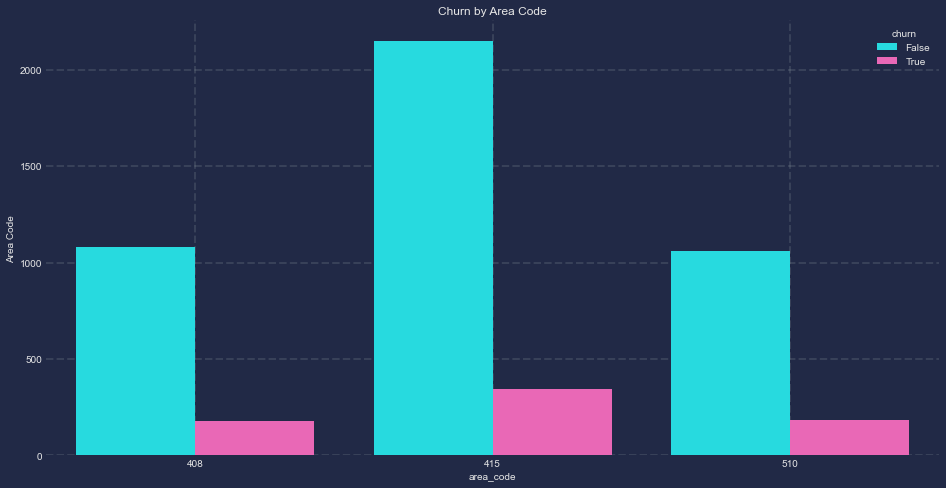

In [71]:
# churn by area code
plt.figure(figsize = (16, 8))
churn_area_code = sns.countplot('area_code', hue = 'churn', data = df)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.2)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
churn_area_code.set(title = "Churn by Area Code", ylabel = 'Area Code')
plt.show()

Area code 415 reports the highest churn rates.

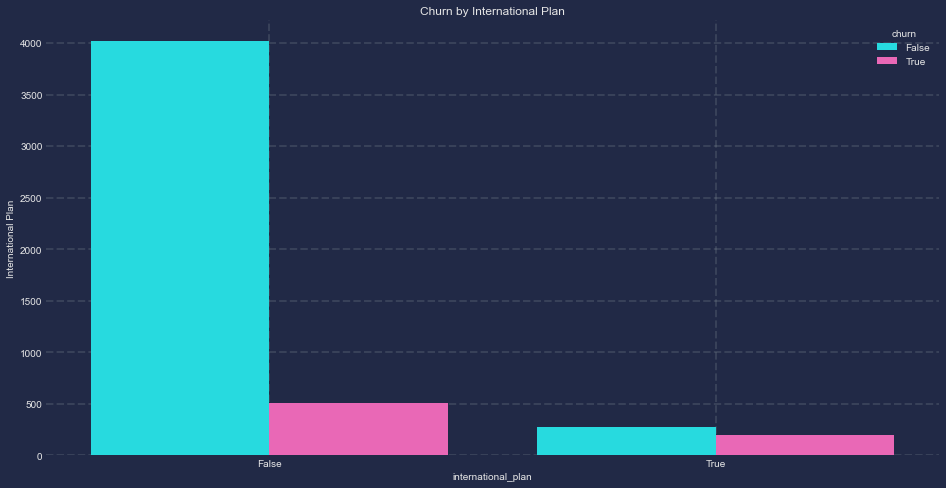

In [72]:
# churn by international plan
plt.figure(figsize = (16, 8))
churn_area_code = sns.countplot('international_plan', hue = 'churn', data = df)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.2)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
churn_area_code.set(title = "Churn by International Plan", ylabel = 'International Plan')
plt.show()

Those without international plans churned more than those with international plans.

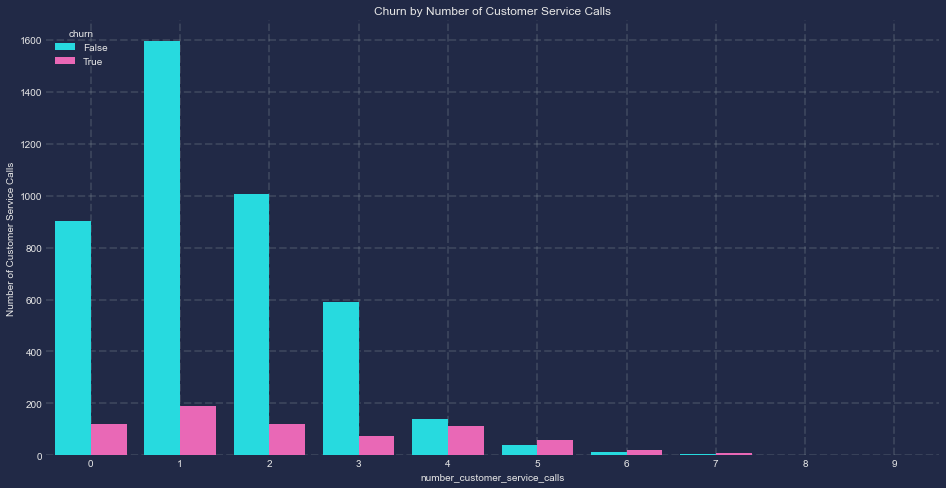

In [73]:
# churn by number of customer service calls
plt.figure(figsize = (16, 8))
churn_area_code = sns.countplot('number_customer_service_calls', hue = 'churn', data = df )
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.2)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
churn_area_code.set(title = "Churn by Number of Customer Service Calls",
                    ylabel = 'Number of Customer Service Calls')
plt.show()

The interesting thing to note here is that those who made 0 or 2 calls to customer service churned at around the same rate. Similarly, those who made more than 3 calls reported high churn rates.

### 3.3 Feature Engineering & Test for Multicollinearity

Before we can carry out the test for multicollinearity (a requirement for logistic regression), we need to convert the values of 'international_plan' and 'churn' to binary.

In [74]:
df['international_plan'] = df['international_plan'].replace({False : 0, True : 1})
df['churn'] = df['churn'].replace({False : 0, True : 1})
df.head()

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,0,10.6,3,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,2.86,3,0
1,137,510,0,9.5,7,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,2.57,0,0
2,103,408,0,13.7,6,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,3.70,1,0
3,99,415,0,15.7,2,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,4.24,1,0
4,108,415,0,7.7,4,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,2.08,2,0


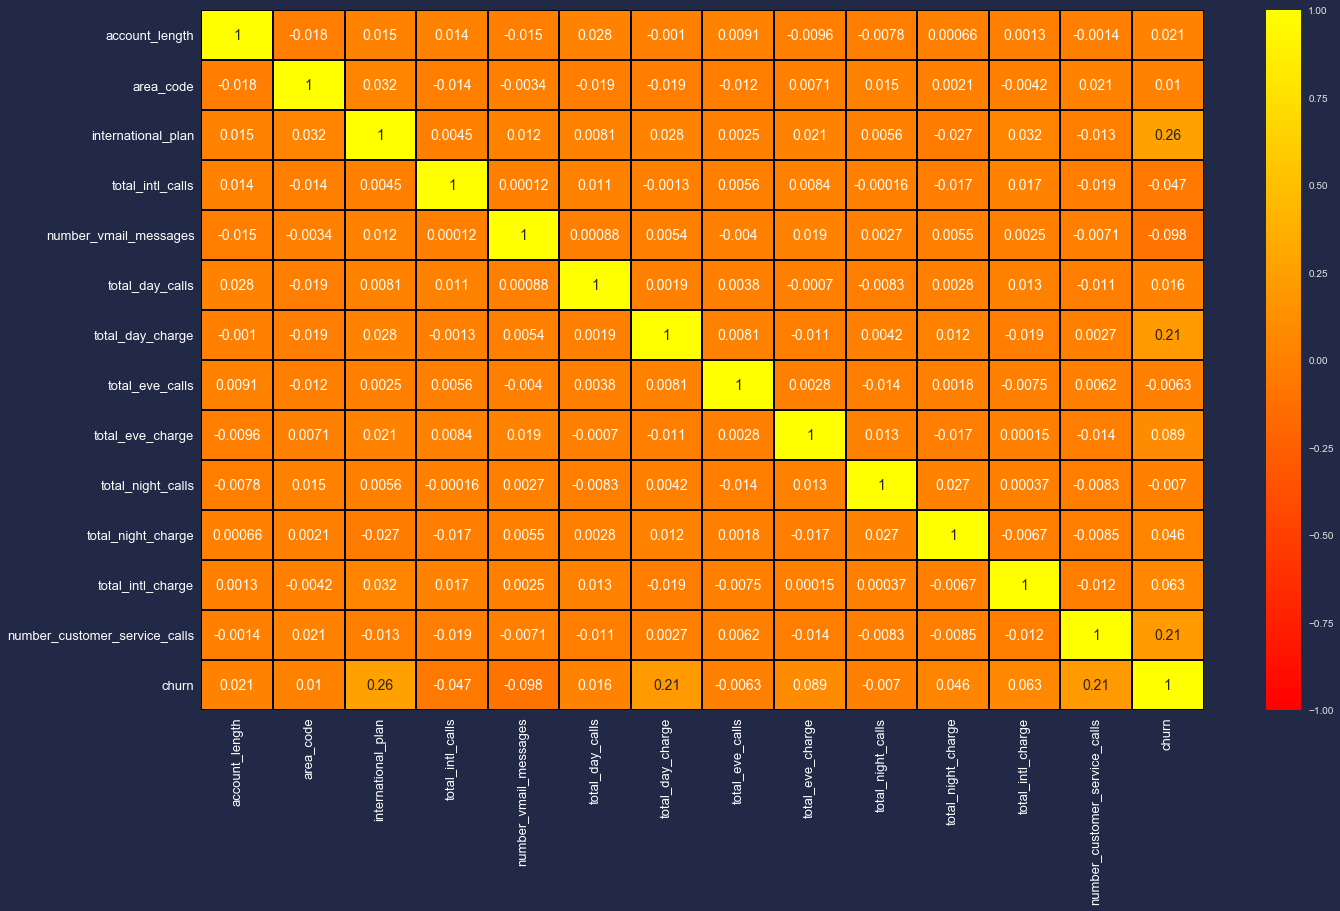

In [150]:
# checking the correlations between the numerical variables
df_corr = df.corr()
df_corr
# plotting the correlations onto a heatmap
plt.style.use("cyberpunk")
plt.figure(figsize=(20,12))
sns.heatmap(df_corr, vmin = -1, vmax = 1, annot=True, linewidths= 1, linecolor='black', cmap = "autumn")
plt.xticks(color='white', fontsize=13)
plt.yticks(color='white', fontsize=13)
plt.show()

We see some perfect correlations between the following variables:
- 'total_day_minutes' and 'total_day_charge'
- 'total_eve_minutes' and 'total_eve_charge'
- 'total_night_minutes' and 'total_night_charge'
- 'total_intl_minutes' and 'total_intl_charge'

We will drop the minutes.

In [76]:
# drop the columns with minutes, e.g., 'total_day_minutes', etc.
df.drop(columns = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'], axis =1 , inplace = True)

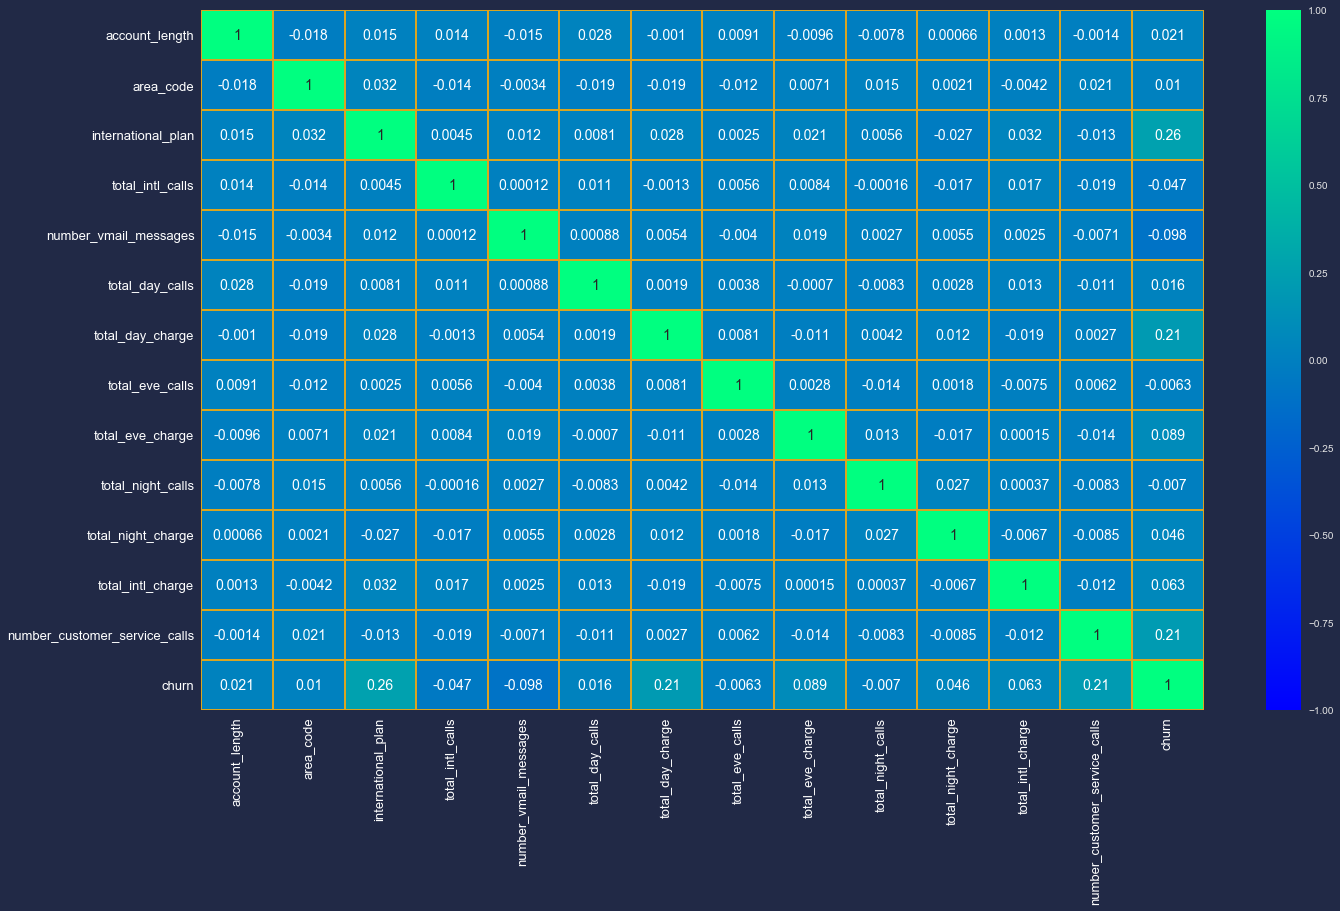

In [148]:
# checking the correlations between the numerical variables
df_corr = df.corr()
df_corr

# plotting the correlations onto a heatmap
plt.figure(figsize=(20,12))
sns.heatmap(df_corr, vmin = -1, vmax = 1, annot=True , linewidths=1, linecolor="goldenrod" ,cmap = "winter")
plt.xticks(color='white', fontsize=13)
plt.yticks(color='white', fontsize=13)
plt.show()

We will then check the Variance Inflation Factor (VIF) scores to ensure there is no high multicollinearity.

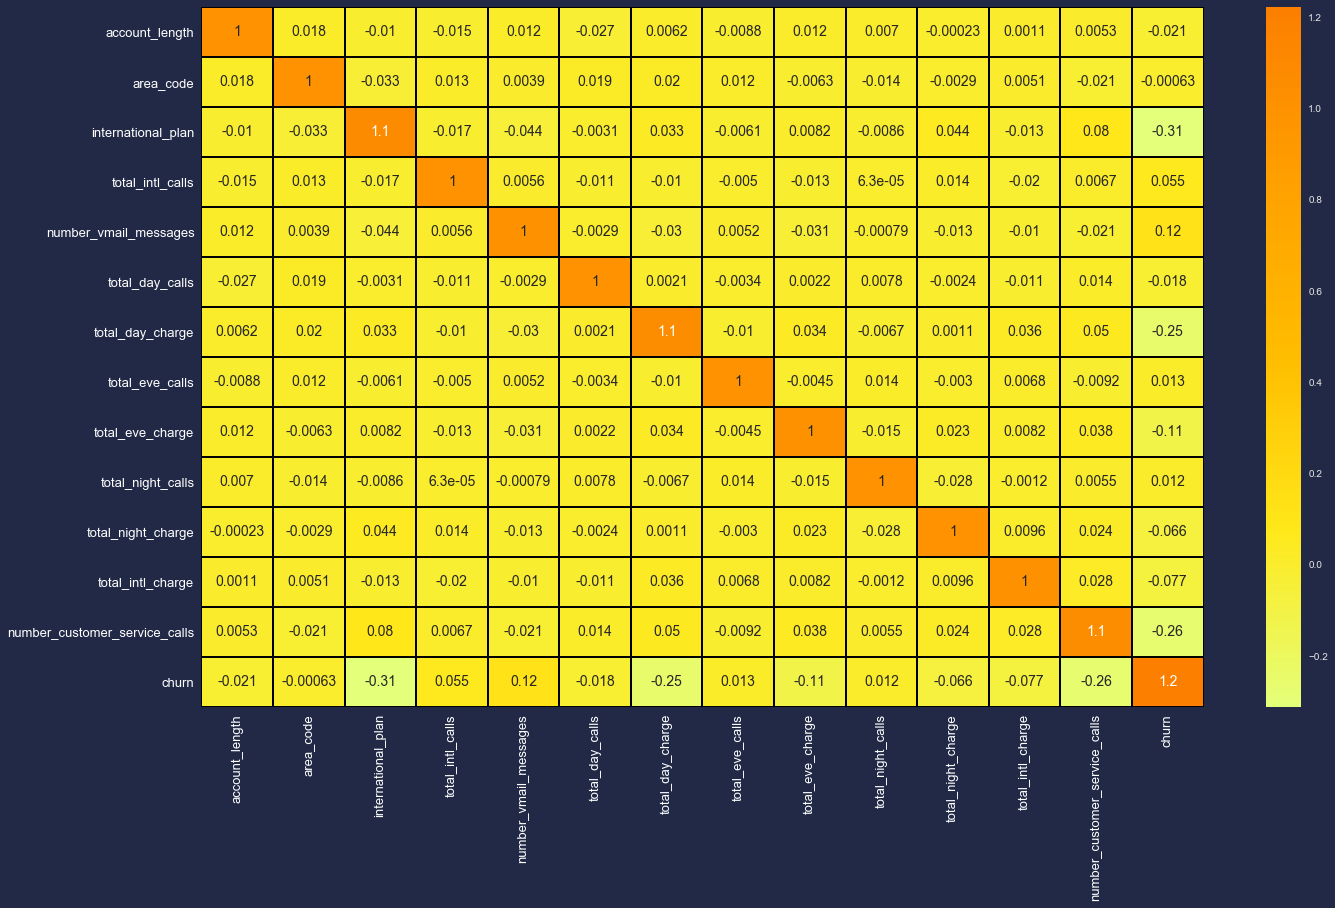

In [149]:
# calculate VIF and plot the heatmap
corr = df_corr
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

plt.style.use("cyberpunk")
plt.figure(figsize = (20, 12))
sns.heatmap(vif, annot = True, linewidths=1 , linecolor = "black" , cmap = 'Wistia')
plt.xticks(color='white', fontsize=13)
plt.yticks(color='white', fontsize=13)
plt.show()

We don't see any VIF score of 5 and above, which means our dataset does not have high levels of multicollinearity. We are, therefore, good to go.

## <font color='#2F4F4F'>4. Data Modeling</font>

We will carry out 5 types of classification analysis, namely:
1. Logistic Regression
2. Gaussian Naive Bayes (NB) classification
3. Decision Trees Classification
4. K-Nearest Neighbors (KNN) Classification
5. Support Vector Machine (SVM) Classification

We will then compare the different classification models to assess the best performing one(s).

In [79]:
# dividing our dataset into features (X) and target (y)

X = df.drop(['churn'] , axis = 1)

y = df['churn']

In [80]:
# splitting into 80-20 train-test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [81]:
# performing feature scaling on our training data
from sklearn.preprocessing import StandardScaler

# we then create an instance scaler of the object StandardScaler
scaler = StandardScaler()

# fitting and transforming X_train while transforming X_test
# fitting and transforming X_train while transforming X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
# loading our classification libraries
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# instantiating our classifiers
logistic_classifier = LogisticRegression(random_state=0, solver='lbfgs')
decision_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(n_neighbors=5)
svm_classifier = SVC()
naive_classifier = GaussianNB()

# fitting our classifiers to the training data
logistic_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
decision_classifier.fit(X_train, y_train)
naive_classifier.fit(X_train, y_train)

# making predictions
logistic_y_prediction = logistic_classifier.predict(X_test)
decision_y_prediction = decision_classifier.predict(X_test)
svm_y_prediction = svm_classifier.predict(X_test)
knn_y_prediction = knn_classifier.predict(X_test)
naive_y_prediction = naive_classifier.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score

# classification report for Logistic Regression
print("Logistic Regression Accuracy Score:\n")
print(accuracy_score(y_test, logistic_y_prediction))

# classification report for Gaussian Naive Bayes Classifier
print("Gaussian Naive Bayes Accuracy Score:\n")
print(accuracy_score(y_test, naive_y_prediction))

# classification report for Decision Tree Classifier
print("Decision Tree Accuracy Score:\n")
print(accuracy_score(y_test, decision_y_prediction))

# classification report for K-Nearest Neighbors Classifier
print("K-Nearest Neighbors Accuracy Score:\n")
print(accuracy_score(y_test, knn_y_prediction))

# classification report for Support Vector Machine Classifier
print("Support Vector Machine Accuracy Score:\n")
print(accuracy_score(y_test, svm_y_prediction))

Logistic Regression Accuracy Score:

0.857
Gaussian Naive Bayes Accuracy Score:

0.852
Decision Tree Accuracy Score:

0.923
K-Nearest Neighbors Accuracy Score:

0.883
Support Vector Machine Accuracy Score:

0.905


We see that the Decision Tree Classifier was the most accurate (92%) followed by the Support VectorMachine Classifier (90%). However, we also see that our dataset is highly imbalanced, with more False values for 'churn' than True values (849 vs 151). Accuracy_Score in this case may not a very good method to evaluate the models' performance as the dataset is highly imbalanced.

In [83]:
# printing the classification report for each classifier to assess performance
from sklearn.metrics import classification_report

# classification report for Logistic Regression
print("Logistic Regression classification report:\n")
print(classification_report(y_test, logistic_y_prediction))

# classification report for Gaussian Naive Bayes Classifier
print("Gaussian Naive Bayes classification report:\n")
print(classification_report(y_test, naive_y_prediction))

# classification report for Decision Tree Classifier
print("Decision Tree classification report:\n")
print(classification_report(y_test, decision_y_prediction))

# classification report for K-Nearest Neighbors Classifier
print("K-Nearest Neighbors classification report:\n")
print(classification_report(y_test, knn_y_prediction))

# classification report for Support Vector Machine Classifier
print("Support Vector Machine classification report:\n")
print(classification_report(y_test, svm_y_prediction))

Logistic Regression classification report:

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       849
           1       0.58      0.19      0.29       151

    accuracy                           0.86      1000
   macro avg       0.73      0.58      0.60      1000
weighted avg       0.83      0.86      0.83      1000

Gaussian Naive Bayes classification report:

              precision    recall  f1-score   support

           0       0.90      0.94      0.91       849
           1       0.51      0.38      0.44       151

    accuracy                           0.85      1000
   macro avg       0.70      0.66      0.68      1000
weighted avg       0.84      0.85      0.84      1000

Decision Tree classification report:

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       849
           1       0.76      0.72      0.74       151

    accuracy                           0.92      1000
 

We see that the Decision Tree Classifier was the most accurate (92%) followed by the Support VectorMachine Classifier (90%). However, we also see that our dataset is highly imbalanced, with more False values for 'churn' than True values (849 vs 151).

We can also asses the performance of our models using a Confusion Matrix. I will do this with the help of visualizations from the Yellowbrick visualization library.

In [ ]:
# importing the Yellowbrick library
pip install -U yellowbrick

0.857

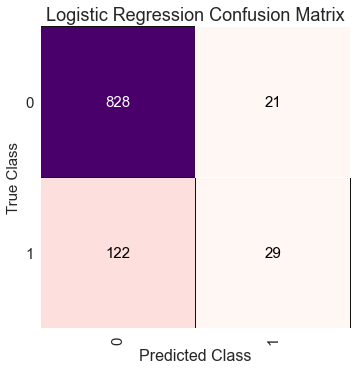

In [117]:
from yellowbrick.classifier import ConfusionMatrix

# Classification Report for the Logistic Regression Classifier
plt.figure()
plt.title("Logistic Regression Confusion Matrix", fontsize=18)
plt.xlabel("Predicted Class", fontsize=16)
plt.ylabel("True Class", fontsize=15)
cm = ConfusionMatrix(logistic_classifier, classes=[0,1], size=(400,400), fontsize=15, cmap='RdPu')
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

0.923

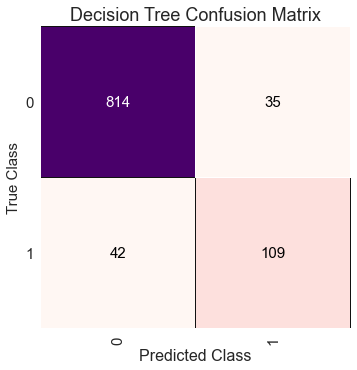

In [86]:
# Classification Report for the Decession Tree Classifier
plt.figure()
plt.title("Decision Tree Confusion Matrix", fontsize=18)
plt.xlabel("Predicted Class", fontsize=16)
plt.ylabel("True Class", fontsize=15)
cm = ConfusionMatrix(decision_classifier, classes=[0,1], size=(400,400), fontsize=15, cmap='RdPu')
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

0.883

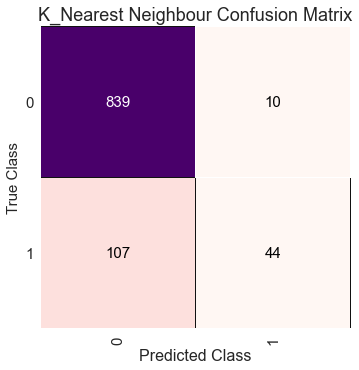

In [87]:
# Classification Report for the K-Nearest Neighbours Classifier
plt.figure()
plt.title("K_Nearest Neighbour Confusion Matrix", fontsize=18)
plt.xlabel("Predicted Class", fontsize=16)
plt.ylabel("True Class", fontsize=15)
cm = ConfusionMatrix(knn_classifier, classes=[0,1], size=(400,400), fontsize=15, cmap='RdPu')
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

0.905

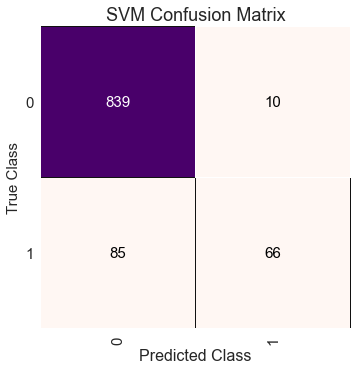

In [88]:
# Classification Report for the Support Vector Machine Classifier
plt.figure()
plt.title("SVM Confusion Matrix", fontsize=18)
plt.xlabel("Predicted Class", fontsize=16)
plt.ylabel("True Class", fontsize=15)
cm = ConfusionMatrix(svm_classifier, classes=[0,1], size=(400,400), fontsize=15, cmap='RdPu')
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

0.852

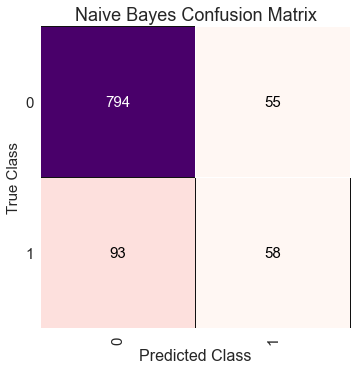

In [89]:
# Classification Report for the Naive Bayes Classifier
plt.figure()
plt.title("Naive Bayes Confusion Matrix", fontsize=18)
plt.xlabel("Predicted Class", fontsize=16)
plt.ylabel("True Class", fontsize=15)
cm = ConfusionMatrix(naive_classifier, classes=[0,1], size=(400,400), fontsize=15, cmap='RdPu')
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

## <font color='#2F4F4F'>5. Summary of Findings</font>

This dataset is very biased: it has disproportionate numbers of those with international plans vs those without international plans, and of those who churned vs those who didn't. Also, this dataset had more records of customers from Area Code 415. Hence, the results cannot really be trusted.

However, from our analysis, we see that customers who made at least 2 calls to customer service are likely to churn.

## <font color='#2F4F4F'>6. Recommendations</font>

The company should come up with a solution that caters to customers that make two or more calls to customer service. They should also collect more data, preferably those that will make the current dataset more balanced, e.g., more customers from Area Codes 408 and 510, more customers who churned, and more customers subscribed to the international plan.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

Firstly, a balanced dataset needs to be obtained, where the differences between the distinct values in the 'international_plan' and 'churn' variables are not so great.

Secondly, all other assumptions need to be met, such as no influential values (outliers)in predictor variables before applying logistic regression.

Finally, hyperparameter tuning should be carried out on the current models to improve them.